In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
import seaborn as sns
import matplotlib.pyplot as plt
import re
from itertools import product
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('diabetic_data.csv')

In [3]:
data.head(60)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,?,?,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,?,?,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,?,?,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,?,?,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,?,InternalMedicine,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
print(sum(data.duplicated()))
print(data.shape)
print(data.isna().sum())

0
(101766, 50)
encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide              

In [5]:
#checking columns with unknown values
for col in data.columns:
    print(col,(data[col] =='?').sum())

encounter_id 0
patient_nbr 0
race 2273
gender 0
age 0
weight 98569
admission_type_id 0
discharge_disposition_id 0
admission_source_id 0
time_in_hospital 0
payer_code 40256
medical_specialty 49949
num_lab_procedures 0
num_procedures 0
num_medications 0
number_outpatient 0
number_emergency 0
number_inpatient 0
diag_1 21
diag_2 358
diag_3 1423
number_diagnoses 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


- dropping columns with a lot of unknown values

In [6]:
data = data.drop(columns = ['weight','medical_specialty', 'payer_code'])

In [7]:
for item in data.columns:
    print(data[item].value_counts())

2278392      1
190792044    1
190790070    1
190789722    1
190786806    1
            ..
106665324    1
106657776    1
106644876    1
106644474    1
443867222    1
Name: encounter_id, Length: 101766, dtype: int64
88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: patient_nbr, Length: 71518, dtype: int64
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64
1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4    

In [8]:
# filling ? cells with 'unknown'
data = data.apply(lambda x: x.replace("?", 'unknown'))

### Cleaning numericals

In [9]:
numerical = data.select_dtypes(include = np.number)
numerical.head()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,2278392,8222157,6,25,1,1,41,0,1,0,0,0,1
1,149190,55629189,1,1,7,3,59,0,18,0,0,0,9
2,64410,86047875,1,1,7,2,11,5,13,2,0,1,6
3,500364,82442376,1,1,7,2,44,1,16,0,0,0,7
4,16680,42519267,1,1,7,1,51,0,8,0,0,0,5


In [10]:
cat_cols = ['encounter_id', 'patient_nbr','admission_type_id','discharge_disposition_id','admission_source_id']
for col in cat_cols:   
    data[col] = data[col].astype('object')

In [11]:
numerical = numerical.drop(columns = ['encounter_id', 'patient_nbr','admission_type_id','discharge_disposition_id','admission_source_id'])

### Feature Selection with KBest
- I only have 8 numerical columns, but I want to see the order of importance, maybe I can drop some of them when fitting my models

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(numerical)

In [13]:
X = numerical_scaled
y = data['readmitted']

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
kbest = SelectKBest(chi2, k=8).fit_transform(X, y)

selected = pd.DataFrame(kbest)
selected.head()

,0,1,2,3,4,5,6,7
0,0.000000,0.305344,0.000000,0.0000,0.000000,0.0,0.000000,0.000000
1,0.153846,0.442748,0.000000,0.2125,0.000000,0.0,0.000000,0.533333
2,0.076923,0.076336,0.833333,0.1500,0.047619,0.0,0.047619,0.333333
3,0.076923,0.328244,0.166667,0.1875,0.000000,0.0,0.000000,0.400000
4,0.000000,0.381679,0.000000,0.0875,0.000000,0.0,0.000000,0.266667


In [14]:
kbest = SelectKBest(chi2, k=8).fit(X, y)
df = pd.DataFrame(data = kbest.scores_, columns = ['score'])
df['Column'] = numerical.columns
df.sort_values(by = ['score'], ascending = False).head(7)

,score,Column
6,669.216104,number_inpatient
2,74.810104,num_procedures
4,73.041399,number_outpatient
0,68.531651,time_in_hospital
5,65.284473,number_emergency
7,50.229612,number_diagnoses
3,14.993586,num_medications


In [15]:
cols = df.sort_values(by = ['score'], ascending = False).head(8)['Column']
list(cols)

['number_inpatient',
 'num_procedures',
 'number_outpatient',
 'time_in_hospital',
 'number_emergency',
 'number_diagnoses',
 'num_medications',
 'num_lab_procedures']

- None of them have high correlation

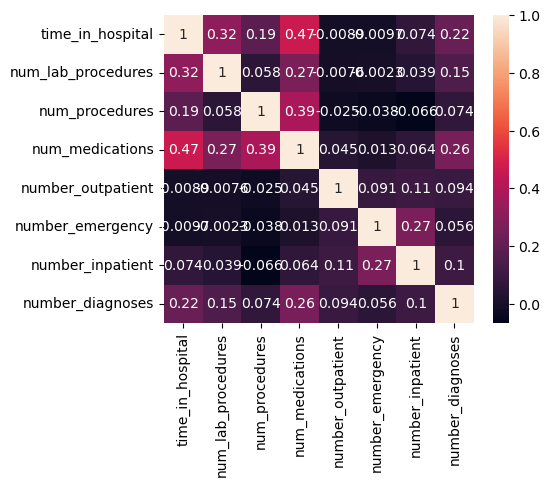

In [16]:
corr_matrix=numerical.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

### Cleaning categoricals

In [17]:
categorical = data.select_dtypes(include = object)
categorical.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,250.83,unknown,unknown,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,276,250.01,255,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,648,250,V27,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,8,250.43,403,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,197,157,250,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [18]:
for col in categorical.columns:
    categorical[col] = categorical[col].astype('object')
    print(categorical[col].value_counts())

2278392      1
190792044    1
190790070    1
190789722    1
190786806    1
            ..
106665324    1
106657776    1
106644876    1
106644474    1
443867222    1
Name: encounter_id, Length: 101766, dtype: int64
88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: patient_nbr, Length: 71518, dtype: int64
Caucasian          76099
AfricanAmerican    19210
unknown             2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64
1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4    

In [19]:
# race majority is in 2 columns so I will reduce them into 3 groups
categorical['race'] = np.where(categorical['race'].isin(['AfricanAmerican','Caucasian']) , categorical['race'],'other' )

In [20]:
#filling 3 nan values with most frequent value
categorical['gender'] = np.where(categorical['gender'].isin(['Unknown/Invalid']) , 'Female', categorical['gender'])

In [21]:
# I will put middle value of the range for the age column
scale_mapper = {"[0-10)":5, "[10-20)":15, "[20-30)":25,"[30-40)":35,"[40-50)":45,"[50-60)":55,"[60-70)":65,"[70-80)":75,"[80-90)":85,"[90-100)":95}
categorical["age"] = categorical["age"].replace(scale_mapper)

In [22]:
# replacing Yes-No with 1-0
categorical['diabetesMed'] = np.where(categorical['diabetesMed'].isin(['Yes']) , 1 , 0)
categorical['change'] = np.where(categorical['change'].isin(['Ch']) , 1 , 0)

Cleaning diag_1, diag_2, diag_3 columns

- A disease of the circulatory system (icd9: 390–459, 785)	
- Diabetes (icd9: 250.xx)	
- A disease of the respiratory system (icd9: 460–519, 786)
- Diseases of the digestive system (icd9: 520–579, 787)	
- Injury and poisoning (icd9: 800–999)	
- Diseases of the musculoskeletal system and connective tissue (icd9: 710–739)	
- Diseases of the genitourinary system (icd9: 580–629, 788)
- Neoplasms (icd9: 140–239)
- Other

In [23]:
diag_cols = ['diag_1','diag_2','diag_3']

In [24]:
for col in diag_cols:
    categorical[col] = np.where(categorical[col].str.contains("E", case=False) , 'external_injury', categorical[col])
    categorical[col] = np.where(categorical[col].str.contains("V", case=False) , 'external_injury', categorical[col])

In [25]:
for col in diag_cols: 
    categorical[col] = categorical[col].astype('string')
    categorical[col] = np.where(categorical[col].str.contains("250", case=False) , 'diabetes', categorical[col])
    categorical[col] = np.where(categorical[col].str.contains("4[6-9][0-9]|5[0-1][0-9]|786", case=False) , 'respiratory', categorical[col])
    categorical[col] = np.where(categorical[col].str.contains("39[0-9]|4[0-5][0-9]|785", case=False) , 'circulatory', categorical[col])
    categorical[col] = np.where(categorical[col].str.contains("5[2-7][0-9]|787", case=False) , 'digestive', categorical[col])
    categorical[col] = np.where(categorical[col].str.contains("[8-9][0-9][0-9]", case=False) , 'injury_poisoning', categorical[col])
    categorical[col] = np.where(categorical[col].str.contains("7[1-3][0-9]", case=False) , 'musculoskeletal', categorical[col])
    categorical[col] = np.where(categorical[col].str.contains("5[8-9][0-9]|6[0-2][0-9]|788", case=False) , 'genitourinary', categorical[col])
    categorical[col] = np.where(categorical[col].str.contains("1[4-9][0-9]|2[0-3][0-9]", case=False) , 'neoplasms', categorical[col])

In [26]:
for col in diag_cols: 
    categorical[col] = np.where(categorical[col].str.contains("7[8-9][0-9]", case=False) , 'other', categorical[col])
    categorical[col] = np.where(categorical[col].str.contains("2[4][0-9]|2[5][1-9]|2[6-7][0-9]", case=False) , 'endocrine', categorical[col])
    categorical[col] = np.where(categorical[col].str.contains("6[8-9][0-9]|7[0][0-9]|782", case=False) , 'skin', categorical[col])
    categorical[col] = np.where(categorical[col].str.contains("29[0-9]|3[0-1][0-9]", case=False) , 'mental_disorders', categorical[col])    

In [27]:
for col in diag_cols:
    categorical[col] = np.where(categorical[col].str.contains("28[0-9]", case=False) , 'blood', categorical[col])
    categorical[col] = np.where(categorical[col].str.contains("3[2-5][0-9]", case=False) , 'nervous_system', categorical[col])
    categorical[col] = np.where(categorical[col].str.contains("6[3-7][0-9]", case=False) , 'pregnancy_complications', categorical[col])
    categorical[col] = np.where(categorical[col].str.contains("3[6-8][0-9]", case=False) , 'sense_organ', categorical[col])
    categorical[col] = np.where(categorical[col].str.contains("7[4-5][0-9]", case=False) , 'congen_anomalities', categorical[col])

In [28]:
for col in diag_cols:
    categorical[col] = np.where(categorical[col].isin(['external_injury','diabetes','respiratory','circulatory',
                                                       'digestive','neoplasms','genitourinary','endocrine','injury_poisoning',
                                                       'mental_disorders','musculoskeletal','blood','skin',
                                                       'nervous_system','pregnancy_complications',
                                                       'sense_organ','congen_anomalities','unknown','other']),categorical[col], 'other')

In [29]:
categorical.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5,6,25,1,diabetes,unknown,unknown,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,0,NO
1,149190,55629189,Caucasian,Female,15,1,1,7,endocrine,diabetes,endocrine,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,1,1,>30
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,pregnancy_complications,diabetes,external_injury,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,1,NO
3,500364,82442376,Caucasian,Male,35,1,1,7,other,diabetes,circulatory,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,1,1,NO
4,16680,42519267,Caucasian,Male,45,1,1,7,neoplasms,neoplasms,diabetes,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,1,1,NO


- age, max glue serum, A1CResult are categorical but they have hierarchical order, so I will encode them manually

In [30]:
categorical['A1Cresult'] = np.where(categorical['A1Cresult'].isin(['>8','>7']) , 2 , categorical['A1Cresult'])
categorical['max_glu_serum'] = np.where(categorical['max_glu_serum'].isin(['>200','>300']) , 2 , categorical['max_glu_serum'])

In [31]:
scale_mapper = {"None":0,"Norm":1}
categorical["max_glu_serum"] = categorical["max_glu_serum"].replace(scale_mapper)

In [32]:
scale_mapper = {"None":0,"Norm":1}
categorical["A1Cresult"] = categorical["A1Cresult"].replace(scale_mapper)

In [33]:
cols = ['metformin','repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

In [34]:
for col in cols:
    print(categorical[col].value_counts())

No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64
No        100227
Steady      1384
Up           110
Down          45
Name: repaglinide, dtype: int64
No        101063
Steady       668
Up            24
Down          11
Name: nateglinide, dtype: int64
No        101680
Steady        79
Up             6
Down           1
Name: chlorpropamide, dtype: int64
No        96575
Steady     4670
Up          327
Down        194
Name: glimepiride, dtype: int64
No        101765
Steady         1
Name: acetohexamide, dtype: int64
No        89080
Steady    11356
Up          770
Down        560
Name: glipizide, dtype: int64
No        91116
Steady     9274
Up          812
Down        564
Name: glyburide, dtype: int64
No        101743
Steady        23
Name: tolbutamide, dtype: int64
No        94438
Steady     6976
Up          234
Down        118
Name: pioglitazone, dtype: int64
No        95401
Steady     6100
Up          178
Down         87
Name: rosiglitazone, dty

- I will encode this results as either it is steady or not performed with 0, or up-down showing some anomality as 1, otherwise i have very few different values in some columns.
- I will also drop some columns which has only 1 unique value

In [35]:
for col in cols:
    categorical[col] = np.where(categorical[col].isin(['No','Steady']),0,1)

In [36]:
for col in cols:
    print(categorical[col].value_counts())

0    100124
1      1642
Name: metformin, dtype: int64
0    101611
1       155
Name: repaglinide, dtype: int64
0    101731
1        35
Name: nateglinide, dtype: int64
0    101759
1         7
Name: chlorpropamide, dtype: int64
0    101245
1       521
Name: glimepiride, dtype: int64
0    101766
Name: acetohexamide, dtype: int64
0    100436
1      1330
Name: glipizide, dtype: int64
0    100390
1      1376
Name: glyburide, dtype: int64
0    101766
Name: tolbutamide, dtype: int64
0    101414
1       352
Name: pioglitazone, dtype: int64
0    101501
1       265
Name: rosiglitazone, dtype: int64
0    101753
1        13
Name: acarbose, dtype: int64
0    101759
1         7
Name: miglitol, dtype: int64
0    101766
Name: troglitazone, dtype: int64
0    101765
1         1
Name: tolazamide, dtype: int64
0    101766
Name: examide, dtype: int64
0    101766
Name: citoglipton, dtype: int64
0    78232
1    23534
Name: insulin, dtype: int64
0    101752
1        14
Name: glyburide-metformin, dtype: int64
0 

In [37]:
categorical = categorical.drop(columns = ['glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone',
                                          'metformin-pioglitazone','citoglipton','examide','troglitazone','tolazamide'])

- found the meanings of codes admission_type, admission_source and charge disposition meanings, I will reduce them into smaller groups

In [38]:
categorical['admission_type_id'] = np.where(categorical['admission_type_id'].isin([1]),'emergency',categorical['admission_type_id'])
categorical['admission_type_id'] = np.where(categorical['admission_type_id'].isin([2]),'urgent',categorical['admission_type_id'])
categorical['admission_type_id'] = np.where(categorical['admission_type_id'].isin([3]),'elective',categorical['admission_type_id'])
categorical['admission_type_id'] = np.where(categorical['admission_type_id'].isin([4]),'emergency',categorical['admission_type_id'])
categorical['admission_type_id'] = np.where(categorical['admission_type_id'].isin([5]),'unknown',categorical['admission_type_id'])
categorical['admission_type_id'] = np.where(categorical['admission_type_id'].isin([6]),'unknown',categorical['admission_type_id'])
categorical['admission_type_id'] = np.where(categorical['admission_type_id'].isin([7]),'emergency',categorical['admission_type_id'])
categorical['admission_type_id'] = np.where(categorical['admission_type_id'].isin([8]),'unknown',categorical['admission_type_id'])

In [39]:
categorical['discharge_disposition_id'] = np.where(categorical['discharge_disposition_id'].isin([1]),'dicharged_to_home',categorical['discharge_disposition_id'])
categorical['discharge_disposition_id'] = np.where(categorical['discharge_disposition_id'].isin([3]),'dichr_to_another_hosp',categorical['discharge_disposition_id'])
categorical['discharge_disposition_id'] = np.where(categorical['discharge_disposition_id'].isin([6]),'dichr_to_home_w_healthservice',categorical['discharge_disposition_id'])
categorical['discharge_disposition_id'] = np.where(categorical['discharge_disposition_id'].isin([18]),'unknown',categorical['discharge_disposition_id'])
categorical['discharge_disposition_id'] = np.where(categorical['discharge_disposition_id'].isin([2]),'dichr_to_another_hosp',categorical['discharge_disposition_id'])
categorical['discharge_disposition_id'] = np.where(categorical['discharge_disposition_id'].isin([22]),'dichr_to_another_hosp',categorical['discharge_disposition_id'])
categorical['discharge_disposition_id'] = np.where(categorical['discharge_disposition_id'].isin([11]),'expired',categorical['discharge_disposition_id'])
categorical['discharge_disposition_id'] = np.where(categorical['discharge_disposition_id'].isin([5]),'dichr_to_another_hosp',categorical['discharge_disposition_id'])
categorical['discharge_disposition_id'] = np.where(categorical['discharge_disposition_id'].isin([25]),'unknown',categorical['discharge_disposition_id'])
categorical['discharge_disposition_id'] = np.where(categorical['discharge_disposition_id'].isin([4]),'dichr_to_another_hosp',categorical['discharge_disposition_id'])
categorical['discharge_disposition_id'] = np.where(categorical['discharge_disposition_id'].isin([7]),'discharged_themself',categorical['discharge_disposition_id'])
categorical['discharge_disposition_id'] = np.where(categorical['discharge_disposition_id'].isin([23]),'dichr_to_another_hosp',categorical['discharge_disposition_id'])
categorical['discharge_disposition_id'] = np.where(categorical['discharge_disposition_id'].isin([13]),'dicharged_to_home',categorical['discharge_disposition_id'])
categorical['discharge_disposition_id'] = np.where(categorical['discharge_disposition_id'].isin([14]),'dichr_to_another_hosp',categorical['discharge_disposition_id'])
categorical['discharge_disposition_id'] = np.where(categorical['discharge_disposition_id'].isin([28]),'dichr_to_another_hosp',categorical['discharge_disposition_id'])
categorical['discharge_disposition_id'] = np.where(categorical['discharge_disposition_id'].isin([8]),'dichr_to_home_w_healthservice',categorical['discharge_disposition_id'])
categorical['discharge_disposition_id'] = np.where(categorical['discharge_disposition_id'].isin([15]),'within_institu',categorical['discharge_disposition_id'])
categorical['discharge_disposition_id'] = np.where(categorical['discharge_disposition_id'].isin([24]),'dichr_to_another_hosp',categorical['discharge_disposition_id'])
categorical['discharge_disposition_id'] = np.where(categorical['discharge_disposition_id'].isin([9]),'within_institu',categorical['discharge_disposition_id'])
categorical['discharge_disposition_id'] = np.where(categorical['discharge_disposition_id'].isin([17]),'within_institu',categorical['discharge_disposition_id'])
categorical['discharge_disposition_id'] = np.where(categorical['discharge_disposition_id'].isin([16]),'dichr_to_another_hosp',categorical['discharge_disposition_id'])
categorical['discharge_disposition_id'] = np.where(categorical['discharge_disposition_id'].isin([19]),'expired',categorical['discharge_disposition_id'])
categorical['discharge_disposition_id'] = np.where(categorical['discharge_disposition_id'].isin([10]),'dichr_to_another_hosp',categorical['discharge_disposition_id'])
categorical['discharge_disposition_id'] = np.where(categorical['discharge_disposition_id'].isin([27]),'dichr_to_another_hosp',categorical['discharge_disposition_id'])
categorical['discharge_disposition_id'] = np.where(categorical['discharge_disposition_id'].isin([12]),'within_institu',categorical['discharge_disposition_id'])
categorical['discharge_disposition_id'] = np.where(categorical['discharge_disposition_id'].isin([20]),'expired',categorical['discharge_disposition_id'])

In [40]:
categorical['admission_source_id'] = np.where(categorical['admission_source_id'].isin([7]),'emergency_room',categorical['admission_source_id'])
categorical['admission_source_id'] = np.where(categorical['admission_source_id'].isin([1]),'referral',categorical['admission_source_id'])
categorical['admission_source_id'] = np.where(categorical['admission_source_id'].isin([17]),'unknown',categorical['admission_source_id'])
categorical['admission_source_id'] = np.where(categorical['admission_source_id'].isin([4]),'transfer_from_a_hospital',categorical['admission_source_id'])
categorical['admission_source_id'] = np.where(categorical['admission_source_id'].isin([6]),'transfer_from_a_hospital',categorical['admission_source_id'])
categorical['admission_source_id'] = np.where(categorical['admission_source_id'].isin([2]),'referral',categorical['admission_source_id'])
categorical['admission_source_id'] = np.where(categorical['admission_source_id'].isin([5]),'transfer_from_a_hospital',categorical['admission_source_id'])
categorical['admission_source_id'] = np.where(categorical['admission_source_id'].isin([3]),'referral',categorical['admission_source_id'])
categorical['admission_source_id'] = np.where(categorical['admission_source_id'].isin([20]),'unknown',categorical['admission_source_id'])
categorical['admission_source_id'] = np.where(categorical['admission_source_id'].isin([9]),'unknown',categorical['admission_source_id'])
categorical['admission_source_id'] = np.where(categorical['admission_source_id'].isin([8]),'emergency_room',categorical['admission_source_id'])
categorical['admission_source_id'] = np.where(categorical['admission_source_id'].isin([22]),'transfer_from_a_hospital',categorical['admission_source_id'])
categorical['admission_source_id'] = np.where(categorical['admission_source_id'].isin([10]),'transfer_from_a_hospital',categorical['admission_source_id'])
categorical['admission_source_id'] = np.where(categorical['admission_source_id'].isin([14]),'emergency_room',categorical['admission_source_id'])
categorical['admission_source_id'] = np.where(categorical['admission_source_id'].isin([11]),'emergency_room',categorical['admission_source_id'])
categorical['admission_source_id'] = np.where(categorical['admission_source_id'].isin([25]),'transfer_from_a_hospital',categorical['admission_source_id'])
categorical['admission_source_id'] = np.where(categorical['admission_source_id'].isin([13]),'emergency_room',categorical['admission_source_id'])

In [41]:
for col in categorical.columns:
    print(categorical[col].value_counts())

2278392      1
190792044    1
190790070    1
190789722    1
190786806    1
            ..
106665324    1
106657776    1
106644876    1
106644474    1
443867222    1
Name: encounter_id, Length: 101766, dtype: int64
88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: patient_nbr, Length: 71518, dtype: int64
Caucasian          76099
AfricanAmerican    19210
other               6457
Name: race, dtype: int64
Female    54711
Male      47055
Name: gender, dtype: int64
75    26068
65    22483
55    17256
85    17197
45     9685
35     3775
95     2793
25     1657
15      691
5       161
Name: age, dtype: int64
emergency    54021
elective     18869
urgent       18480
unknown      10396
Name: admission_type_id, dtype: int64
dicharged_to_home                60633
dichr_to_another_hosp            21067
dichr_to_home_w_healthservice    13010
unknown                      

- saving the data

In [42]:
data = pd.concat((numerical,categorical),axis=1)
data.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,insulin,glyburide-metformin,change,diabetesMed,readmitted
0,1,41,0,1,0,0,0,1,2278392,8222157,Caucasian,Female,5,unknown,unknown,referral,diabetes,unknown,unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NO
1,3,59,0,18,0,0,0,9,149190,55629189,Caucasian,Female,15,emergency,dicharged_to_home,emergency_room,endocrine,diabetes,endocrine,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,>30
2,2,11,5,13,2,0,1,6,64410,86047875,AfricanAmerican,Female,25,emergency,dicharged_to_home,emergency_room,pregnancy_complications,diabetes,external_injury,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NO
3,2,44,1,16,0,0,0,7,500364,82442376,Caucasian,Male,35,emergency,dicharged_to_home,emergency_room,other,diabetes,circulatory,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,NO
4,1,51,0,8,0,0,0,5,16680,42519267,Caucasian,Male,45,emergency,dicharged_to_home,emergency_room,neoplasms,neoplasms,diabetes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,NO


In [43]:
data.to_csv('clean_alternative.csv', index = False)

In [44]:
target = categorical[['readmitted']]

In [45]:
categorical = categorical.drop(columns = ['readmitted'])

In [46]:
categorical.to_csv('categorical_alternative.csv', index = False)
numerical.to_csv('numerical_alternative.csv', index = False)
target.to_csv('target.csv',index=False)